In [1]:
#Kütüphanelerin içe aktarılması
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing #Etiketleme için
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
#Keşifsel veri analizi (EDA)
#Verilerin okunması
train=pd.read_csv('C:/datathon/train.csv')
test=pd.read_csv('C:/datathon/testFeatures.csv')

In [3]:
#Veriyi görüntüleme
train.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [4]:
#Veriyi görüntüleme
train.tail()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
227515,2020-12-01,fındık,110,kuruyemiş,51.19,Yurt dışı,B,H
227516,2020-12-01,fıstık,115,kuruyemiş,55.14,Yurt dışı,B,H
227517,2020-12-01,kaju,100,kuruyemiş,58.60,Yurt dışı,B,H
227518,2020-12-01,badem,110,kuruyemiş,51.83,Yurt dışı,B,H
227519,2020-12-01,ceviz,120,kuruyemiş,57.22,Yurt dışı,B,H


In [5]:
#Data alanlarımız hakkında bilgi 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45504 entries, 0 to 45503
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 45504 non-null  int64 
 1   tarih              45504 non-null  object
 2   ürün               45504 non-null  object
 3   ürün besin değeri  45504 non-null  int64 
 4   ürün kategorisi    45504 non-null  object
 5   ürün üretim yeri   45504 non-null  object
 6   market             45504 non-null  object
 7   şehir              45504 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [7]:
train.isna().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [8]:
#Kategorik sütunları görüntüleme
train.describe(include=['O'])

,tarih,ürün,ürün kategorisi,ürün üretim yeri,market,şehir
count,227520,227520,227520,227520,227520,227520
unique,60,79,6,2,3,8
top,2016-01-01,kıyma,sebze ve bakliyat,Yurt içi,M,A
freq,3792,2880,83520,113760,75840,28440


In [3]:
#tarih sütunundan yil ve ay bilgilerini almak
train["tarih"]=pd.to_datetime(train["tarih"])

In [4]:
train["yil"]=train["tarih"].dt.year
train["ay"]=train["tarih"].dt.month
train["gun"]=train["tarih"].dt.year

In [5]:
#test datası için tarih sütunundan yil ve ay bilgilerini almak
train["tarih"]=pd.to_datetime(train["tarih"])

In [12]:
train.dtypes

tarih                datetime64[ns]
ürün                         object
ürün besin değeri             int64
ürün kategorisi              object
ürün fiyatı                 float64
ürün üretim yeri             object
market                       object
şehir                        object
yil                           int64
ay                            int64
gun                           int64
dtype: object

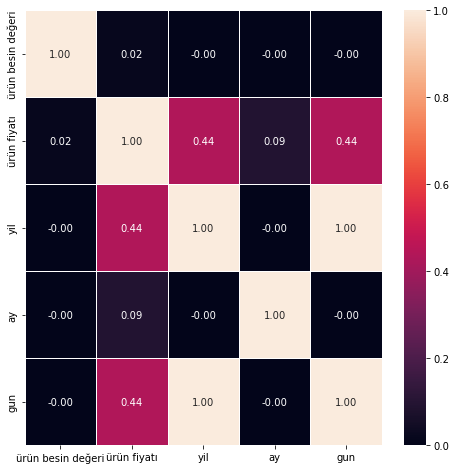

In [13]:
#sayısal alanlardaki korelasyon
corr_1 =train.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f")
plt.show()

In [7]:
market_fiyat= pd.DataFrame(train.groupby(["ürün kategorisi","market"])["ürün fiyatı"].mean())
market_fiyat

ürün fiyatı
ürün kategorisi             market             
et                          B         35.995198
                            C         35.507347
                            M         35.666330
kuruyemiş                   B         30.014744
                            C         30.032744
                            M         30.099960
meyve                       B          9.992151
                            C          9.958138
                            M         10.028312
sebze ve bakliyat           B         14.944694
                            C         14.904890
                            M         14.879722
süt ürünleri ve kahvaltılık B         25.818628
                            C         25.539446
                            M         25.500941
tahıl ve ürünleri           B          9.535002
                            C          9.521207
                            M          9.552688

[None, None, None, None, None, None, None, None, None, None, None, None]

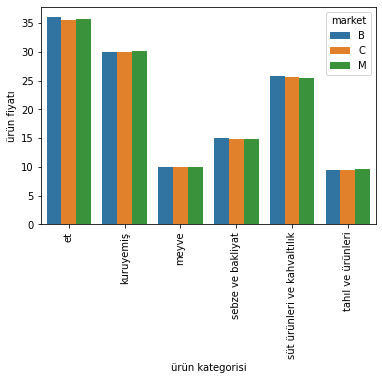

In [8]:
ax=sns.barplot(y="ürün fiyatı",x="ürün kategorisi",hue="market",data=market_fiyat.reset_index())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [21]:
#yer_fiyat.plot(kind='bar')

In [16]:
train["ürün üretim yeri"].value_counts()

Yurt içi     113760
Yurt dışı    113760
Name: ürün üretim yeri, dtype: int64

In [17]:
train["ürün kategorisi"].value_counts()

sebze ve bakliyat              83520
meyve                          51840
tahıl ve ürünleri              34560
süt ürünleri ve kahvaltılık    34560
kuruyemiş                      14400
et                              8640
Name: ürün kategorisi, dtype: int64

In [18]:
kategoriler=train["ürün kategorisi"].unique()

In [9]:
#Üretim yerlerine ve kategorilerine göre gruplanmış ürünlerin ortalama fiyatı
yer_fiyat= pd.DataFrame(train.groupby(["ürün kategorisi","ürün üretim yeri"])["ürün fiyatı"].mean())

In [20]:
yer_fiyat

ürün fiyatı
ürün kategorisi             ürün üretim yeri             
et                          Yurt dışı           35.748868
                            Yurt içi            35.697049
kuruyemiş                   Yurt dışı           29.939331
                            Yurt içi            30.158968
meyve                       Yurt dışı            9.989255
                            Yurt içi             9.996480
sebze ve bakliyat           Yurt dışı           14.908812
                            Yurt içi            14.910725
süt ürünleri ve kahvaltılık Yurt dışı           25.578623
                            Yurt içi            25.660720
tahıl ve ürünleri           Yurt dışı            9.503344
                            Yurt içi             9.569253

[None, None, None, None, None, None, None, None, None, None, None, None]

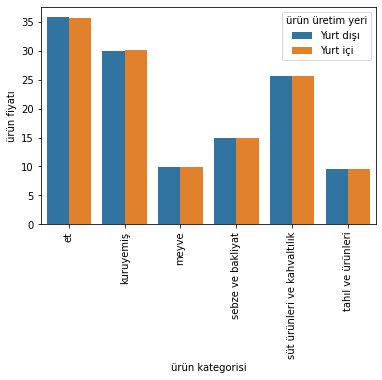

In [10]:
#Üretim yerlerine ve kategorilerine göre gruplanmış ürünlerin fiyatlarının görselleştirilmesi
ax=sns.barplot(y="ürün fiyatı",x="ürün kategorisi",hue="ürün üretim yeri",data=yer_fiyat.reset_index())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [11]:
#Yıllara göre ürünlerin fiyat ortalaması
yillara_gore_ortalama= pd.DataFrame(train.groupby(["ürün kategorisi","yil"])["ürün fiyatı"].mean())
yillara_gore_ortalama

ürün fiyatı
ürün kategorisi             yil              
et                          2016    20.122269
                            2017    25.238576
                            2018    33.369728
                            2019    44.107292
                            2020    55.776927
kuruyemiş                   2016    17.109031
                            2017    21.403479
                            2018    28.072552
                            2019    36.889337
                            2020    46.771347
meyve                       2016     5.662894
                            2017     7.090582
                            2018     9.347296
                            2019    12.291692
                            2020    15.571872
sebze ve bakliyat           2016     8.454689
                            2017    10.601573
                            2018    13.944897
                            2019    18.339276
                            2020    23.208409
süt ürünleri ve kahvaltılık 2016    14.503876
                            2017    18.188082
                            2018    23.945894
                            2019    31.546373
                            2020    39.914133
tahıl ve ürünleri           2016     5.414829
                            2017     6.779239
                            2018     8.926311
                            2019    11.723370
                            2020    14.837746

<AxesSubplot:xlabel='yil', ylabel='ürün fiyatı'>

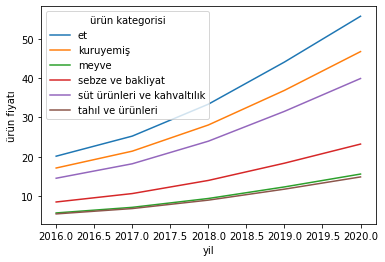

In [12]:
#yillar=yillara_gore_ortalama.iloc[:,:].values
sns.lineplot(data=yillara_gore_ortalama, x="yil", y="ürün fiyatı", hue="ürün kategorisi")

In [13]:
#Data preprocessing
#Kategorik verilerin label encode işlemi ile sayısal verilere dönüştürülmesi

#Label encoder nesnesi oluşturma
le_urun=preprocessing.LabelEncoder()

#trainDF içerisinden ürünler kolonunun alınması
urunler=train.iloc[:,1:2].values

#ürün adlarının encode edilmesi
urunler[:,0]=le_urun.fit_transform(train.iloc[:,1])
print(urunler)

[[65]
 [70]
 [61]
 ...
 [62]
 [55]
 [58]]


In [25]:
urunler.shape

(227520, 1)

In [14]:
#arrayin sayısal değere dönüştürülmesi
urunler.astype(float)

array([[65.],
       [70.],
       [61.],
       ...,
       [62.],
       [55.],
       [58.]])

In [15]:
#Label encoder nesnesi oluşturma
le_sehir=preprocessing.LabelEncoder()

#trainDF içerisinden sehirler kolonunun alınması
sehirler=train.iloc[:,-1:].values

#sehir adlarının encode edilmesi
sehirler[:,0]=le_sehir.fit_transform(train.iloc[:,7])
print(sehirler)

[[0]
 [0]
 [0]
 ...
 [7]
 [7]
 [7]]


In [29]:
sehirler.shape

(227520, 1)

In [16]:
#arrayin sayısal değere dönüştürülmesi
sehirler.astype(float)

array([[0.],
       [0.],
       [0.],
       ...,
       [7.],
       [7.],
       [7.]])

In [17]:
#Label encoder nesnesi oluşturma
le_yer=preprocessing.LabelEncoder()

#trainDF içerisinden ürünler kolonunun alınması
yer=train.iloc[:,5:6].values

#ürün adlarının encode edilmesi
yer[:,0]=le_yer.fit_transform(train.iloc[:,5])
print(yer)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [32]:
yer.shape

(227520, 1)

In [18]:
#arrayin sayısal değere dönüştürülmesi
yer.astype(float)

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [19]:
#market alanının one hot encoding yapılması
markt=train.iloc[:,6:7].values

ohe=preprocessing.OneHotEncoder()
markets=ohe.fit_transform(markt).toarray()
print(markets)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [20]:
#urunler alanını DF'ye dönüştürme
urun_id=pd.DataFrame(data=urunler,index=range(227520),columns=['urunId'])
print(urun_id)

       urunId
0          65
1          70
2          61
3           1
4           2
...       ...
227515     59
227516     60
227517     62
227518     55
227519     58

[227520 rows x 1 columns]


In [21]:
#sehirler alanını DF'ye dönüştürme
sehir_id=pd.DataFrame(data=sehirler,index=range(227520),columns=['sehirId'])
print(sehir_id)

        sehirId
0             0
1             0
2             0
3             0
4             0
...         ...
227515        7
227516        7
227517        7
227518        7
227519        7

[227520 rows x 1 columns]


In [22]:
#uretim yeri alanını DF'ye dönüştürme
uretim_yeri=pd.DataFrame(data=yer,index=range(227520),columns=['UretimYeri'])
print(uretim_yeri)

       UretimYeri
0               1
1               1
2               1
3               1
4               1
...           ...
227515          0
227516          0
227517          0
227518          0
227519          0

[227520 rows x 1 columns]


In [23]:
#market alanını DF'ye dönüştürme
marketss=pd.DataFrame(data=markets,index=range(227520),columns=['B','C','M'])
print(markets)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [24]:
#verimiz içerisinden yıl ve ay bilgisini alma
yil_ay=train.iloc[:,8:10]
yil_ay


,yil,ay
0,2016,1
1,2016,1
2,2016,1
3,2016,1
4,2016,1
...,...,...
227515,2020,12
227516,2020,12
227517,2020,12
227518,2020,12


In [25]:
#Bağımsız değişkenlerin oluşturulması
data=pd.concat([urun_id,uretim_yeri,sehir_id,marketss,yil_ay], axis=1)
x=data.iloc[:,0:].values
x
print(type(x))



<class 'numpy.ndarray'>


In [26]:
#Bağımlı değişkenin oluşturulması
y=train.iloc[:,4].values
print(type(y))
print(y)

<class 'numpy.ndarray'>
[33.41 11.22 11.12 ... 58.6  51.83 57.22]


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
#Linear Regression
lin_reg=LinearRegression()
lin_reg.fit(xtrain,ytrain)



LinearRegression()

In [32]:
pred=lin_reg.predict(xtest)

In [33]:
rmse=np.sqrt(mean_squared_error(ytest, pred))
print(rmse)


11.514678539588687


In [34]:
reg = linear_model.Ridge(alpha=.5)

In [35]:
reg.fit(xtrain,ytrain)

Ridge(alpha=0.5)

In [36]:
reg.predict(xtest)

array([11.99167418,  3.84384463, 20.11772145, ..., 24.55076086,
        9.13331172, 22.29709942])

In [37]:
rmse=np.sqrt(mean_squared_error(ytest, pred))
print(rmse)

11.514678539588687


In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
#Random forrest
rf_reg=RandomForestRegressor(n_estimators=10,random_state=0)
rf_reg.fit(xtrain,ytrain.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [40]:
pred=rf_reg.predict(xtest)

In [55]:
print(pred)

[14.287  6.534 38.813 ... 14.009  6.232 21.907]


In [41]:
rmse=np.sqrt(mean_squared_error(ytest, pred))
print(rmse)

1.0890447956632208


In [81]:
fiyatt=pd.DataFrame(data=pred,columns=['ürün fiyatı'])

In [82]:
fiyatt

,ürün fiyatı
0,14.287
1,6.534
2,38.813
3,9.170
4,6.996
...,...
45499,41.618
45500,15.182
45501,14.009
45502,6.232


In [80]:
index=pd.DataFrame(data=np.arange(45504),columns=['id'])

In [83]:
conc=pd.concat([index,fiyatt], axis=1)

In [77]:
conc

,id,ürün fiyatı
0,0,14.287
1,1,6.534
2,2,38.813
3,3,9.170
4,4,6.996
...,...,...
45499,45499,41.618
45500,45500,15.182
45501,45501,14.009
45502,45502,6.232


In [85]:
import os  
os.makedirs('C:/datathon', exist_ok=True)  
conc.to_csv('C:/datathon/output.csv',index=False) 